In [1]:
!pip install keras cython h5py

In [1]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Using TensorFlow backend.


In [2]:
from mnist import MNIST
mndata = MNIST('./python-mnist/data')
training=mndata.load_training()
testing=mndata.load_testing()

In [3]:
X_train=np.array(training[0])

In [4]:
y_train=np.array(training[1])

In [5]:
X_train.shape

(60000, 784)

In [6]:
X_test=np.array(testing[0])
y_test=np.array(testing[1])

In [7]:
X_train = X_train.reshape(60000,28,28)
X_test = X_test.reshape(10000,28,28)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # scaling
X_test /= 255

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)# 1 becuase we have 1 channel- because black and white
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
keras.backend

<module 'keras.backend' from '/usr/local/lib/python3.5/dist-packages/keras/backend/__init__.py'>

In [12]:
keras.backend.image_data_format()

'channels_last'

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [14]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten, AveragePooling2D
from keras.models import Sequential
from keras.activations import relu, softmax

In [23]:
mlp_LR = Sequential([
    #Dense(1, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),# if insteasd on 24 we put 1- we have LR
    Flatten(input_shape=(28,28,1), name= "flatten_1_mlp"),
    #Dense(16, activation='relu', name = 'dense_2_mlp'),# we add another layer
    #Dropout(0.1),# we regularize
    Dense(10, activation='softmax')
])

In [24]:
mlp_LR.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1_mlp (Flatten)      (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [25]:
mlp_LR.compile(optimizer=keras.optimizers.SGD(), 
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [33]:
mlp_LR_history=mlp_LR.fit(X_train, y_train, validation_split=.2, epochs=60)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 2s 38us/step - loss: 0.2637 - acc: 0.9261 - val_loss: 0.2696 - val_acc: 0.9250
Epoch 2/60
48000/48000 [==============================] - 2s 38us/step - loss: 0.2634 - acc: 0.9264 - val_loss: 0.2688 - val_acc: 0.9257
Epoch 3/60
48000/48000 [==============================] - 2s 37us/step - loss: 0.2632 - acc: 0.9261 - val_loss: 0.2690 - val_acc: 0.9260
Epoch 4/60
48000/48000 [==============================] - 2s 38us/step - loss: 0.2629 - acc: 0.9266 - val_loss: 0.2690 - val_acc: 0.9258
Epoch 5/60
48000/48000 [==============================] - 2s 38us/step - loss: 0.2628 - acc: 0.9264 - val_loss: 0.2689 - val_acc: 0.9263
Epoch 6/60
48000/48000 [==============================] - 2s 38us/step - loss: 0.2626 - acc: 0.9261 - val_loss: 0.2689 - val_acc: 0.9254
Epoch 7/60
48000/48000 [==============================] - 2s 38us/step - loss: 0.2624 - acc: 0.9260 - val_loss: 0.2684 - val_acc

48000/48000 [==============================] - 2s 37us/step - loss: 0.2542 - acc: 0.9286 - val_loss: 0.2664 - val_acc: 0.9278


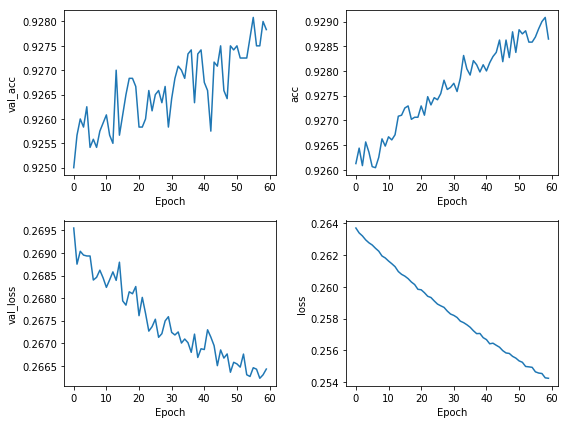

In [34]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_LR_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [29]:
mlp = Sequential([
    Dense(300, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),# if insteasd on 24 we put 1- we have LR
    Flatten(name= "flatten_1_mlp"),
    #Dense(16, activation='relu', name = 'dense_2_mlp'),# we add another layer
    #Dropout(0.1),# we regularize
    Dense(10, activation='softmax')
])

In [30]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 300)       600       
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 235200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2352010   
Total params: 2,352,610
Trainable params: 2,352,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
mlp.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [35]:
mlp_history=mlp.fit(X_train, y_train, validation_split=.2, epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 148s 3ms/step - loss: 0.3070 - acc: 0.9127 - val_loss: 0.2847 - val_acc: 0.9210
Epoch 2/10
48000/48000 [==============================] - 150s 3ms/step - loss: 0.2951 - acc: 0.9156 - val_loss: 0.2800 - val_acc: 0.9211
Epoch 3/10
48000/48000 [==============================] - 150s 3ms/step - loss: 0.2883 - acc: 0.9181 - val_loss: 0.2773 - val_acc: 0.9225
Epoch 4/10
48000/48000 [==============================] - 152s 3ms/step - loss: 0.2833 - acc: 0.9201 - val_loss: 0.2769 - val_acc: 0.9253
Epoch 5/10
48000/48000 [==============================] - 151s 3ms/step - loss: 0.2794 - acc: 0.9214 - val_loss: 0.2776 - val_acc: 0.9227
Epoch 6/10
48000/48000 [==============================] - 150s 3ms/step - loss: 0.2758 - acc: 0.9224 - val_loss: 0.2723 - val_acc: 0.9257
Epoch 7/10
48000/48000 [==============================] - 148s 3ms/step - loss: 0.2733 - acc: 0.9230 - val_loss: 0.2750 - 

In [33]:
#mlp_history.history# this is for first 2 epochs

{'acc': [0.86072916666666666, 0.9057708333333333],
 'loss': [0.56306645963589352, 0.32846130262315271],
 'val_acc': [0.90783333333333338, 0.91616666666666668],
 'val_loss': [0.33185210798184078, 0.29848679395516714]}

In [36]:
mlp_history.history 

{'acc': [0.9127291666666667,
  0.91562500000000002,
  0.91808333333333336,
  0.92010416666666661,
  0.9213958333333333,
  0.92243750000000002,
  0.92304166666666665,
  0.92395833333333333,
  0.92491666666666672,
  0.92472916666666671],
 'loss': [0.30698561668395996,
  0.29505362548679115,
  0.28833263898144168,
  0.28326659712071223,
  0.27943360623593133,
  0.27578812092915178,
  0.27330910636608802,
  0.27067670502637825,
  0.26927223657816646,
  0.26744519975408909],
 'val_acc': [0.92100000000000004,
  0.92108333333333337,
  0.92249999999999999,
  0.92533333333333334,
  0.92266666666666663,
  0.92574999999999996,
  0.92341666666666666,
  0.92358333333333331,
  0.92566666666666664,
  0.92541666666666667],
 'val_loss': [0.28474975141386188,
  0.27997465665141741,
  0.27726130806903043,
  0.27686316205561162,
  0.27758689063787462,
  0.27234151811401047,
  0.27501632528007031,
  0.27882744791110359,
  0.27623072262108328,
  0.2743606141805649]}

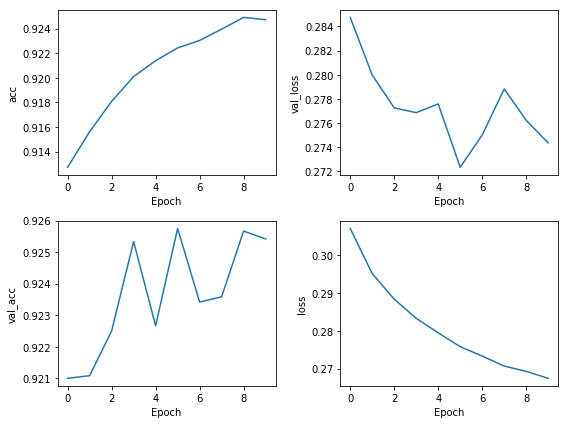

In [37]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [17]:
#I will have to do this on a 10% sample
mlp = Sequential([
    Dense(1000, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),
    Flatten(name= "flatten_1_mlp"),
    Dense(10, activation='softmax')
])

In [18]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 1000)      2000      
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 784000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7840010   
Total params: 7,842,010
Trainable params: 7,842,010
Non-trainable params: 0
_________________________________________________________________


In [19]:
mlp.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [20]:
import numpy as np

In [21]:
idx = np.random.choice(np.arange(len(X_train)), 6000, replace=False)
X_s = X_train[idx]
y_s = y_train[idx]

In [22]:
mlp_history=mlp.fit(X_s, y_s, validation_split=.2, epochs=10, )# batchsize=16,8, 4??? generattors? fit. geberator???

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 50s 10ms/step - loss: 1.5887 - acc: 0.7056 - val_loss: 0.9930 - val_acc: 0.8108
Epoch 2/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.7430 - acc: 0.8375 - val_loss: 0.6207 - val_acc: 0.8425
Epoch 3/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.5309 - acc: 0.8681 - val_loss: 0.5104 - val_acc: 0.8642
Epoch 4/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.4529 - acc: 0.8754 - val_loss: 0.4632 - val_acc: 0.8783
Epoch 5/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.4109 - acc: 0.8852 - val_loss: 0.4344 - val_acc: 0.8775
Epoch 6/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.3810 - acc: 0.8956 - val_loss: 0.4184 - val_acc: 0.8825
Epoch 7/10
4800/4800 [==============================] - 50s 10ms/step - loss: 0.3594 - acc: 0.9008 - val_loss: 0.4057 - val_acc: 0.8875


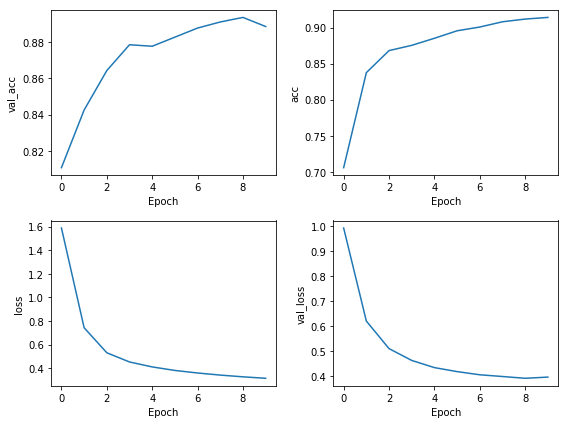

In [23]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [24]:
mlp_2 = Sequential([
    Dense(300, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),
    Flatten(name= "flatten_1_mlp"),
    Dense(100, activation='relu', name = 'dense_2_mlp'),
    Dense(10, activation='softmax')
])

In [25]:
mlp_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 300)       600       
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 235200)            0         
_________________________________________________________________
dense_2_mlp (Dense)          (None, 100)               23520100  
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 23,521,710
Trainable params: 23,521,710
Non-trainable params: 0
_________________________________________________________________


In [26]:
mlp_2.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [27]:
mlp_2_history=mlp.fit(X_s, y_s, validation_split=.2, epochs=10)

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.3041 - acc: 0.9183 - val_loss: 0.3958 - val_acc: 0.8900
Epoch 2/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2978 - acc: 0.9192 - val_loss: 0.3793 - val_acc: 0.8892
Epoch 3/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2888 - acc: 0.9208 - val_loss: 0.3814 - val_acc: 0.8833
Epoch 4/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2815 - acc: 0.9217 - val_loss: 0.3838 - val_acc: 0.8933
Epoch 5/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2757 - acc: 0.9240 - val_loss: 0.3866 - val_acc: 0.8875
Epoch 6/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2685 - acc: 0.9283 - val_loss: 0.3853 - val_acc: 0.8867
Epoch 7/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2639 - acc: 0.9273 - val_loss: 0.3864 - val_acc: 0.8892


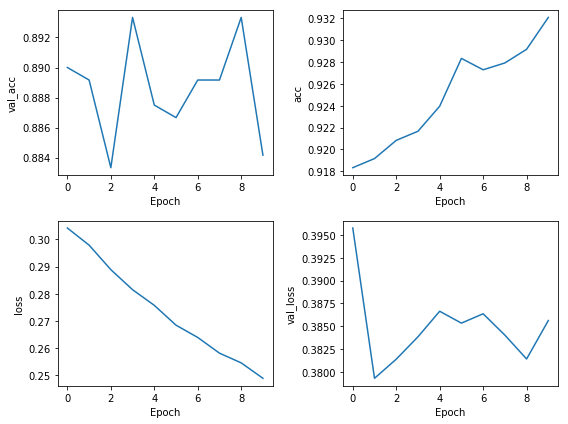

In [33]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_2_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

In [29]:
mlp_3 = Sequential([
    Dense(500, input_shape=(28,28,1), activation='relu', name = 'dense_1_mlp'),
    Flatten(name= "flatten_1_mlp"),
    Dense(150, activation='relu', name = 'dense_2_mlp'),
    Dense(10, activation='softmax')
])

In [30]:
mlp_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1_mlp (Dense)          (None, 28, 28, 500)       1000      
_________________________________________________________________
flatten_1_mlp (Flatten)      (None, 392000)            0         
_________________________________________________________________
dense_2_mlp (Dense)          (None, 150)               58800150  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 58,802,660
Trainable params: 58,802,660
Non-trainable params: 0
_________________________________________________________________


In [31]:
mlp_3.compile(optimizer=keras.optimizers.SGD(),
           loss=keras.losses.categorical_crossentropy,
           metrics=['accuracy'])

In [32]:
mlp_3_history=mlp.fit(X_s, y_s, validation_split=.2, epochs=10)

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2442 - acc: 0.9348 - val_loss: 0.3881 - val_acc: 0.8908
Epoch 2/10
4800/4800 [==============================] - 50s 10ms/step - loss: 0.2402 - acc: 0.9346 - val_loss: 0.3881 - val_acc: 0.8892
Epoch 3/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2372 - acc: 0.9344 - val_loss: 0.4026 - val_acc: 0.8867
Epoch 4/10
4800/4800 [==============================] - 50s 10ms/step - loss: 0.2331 - acc: 0.9365 - val_loss: 0.3918 - val_acc: 0.8917
Epoch 5/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2290 - acc: 0.9371 - val_loss: 0.3886 - val_acc: 0.8892
Epoch 6/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2244 - acc: 0.9385 - val_loss: 0.4006 - val_acc: 0.8858
Epoch 7/10
4800/4800 [==============================] - 49s 10ms/step - loss: 0.2217 - acc: 0.9398 - val_loss: 0.3983 - val_acc: 0.8875


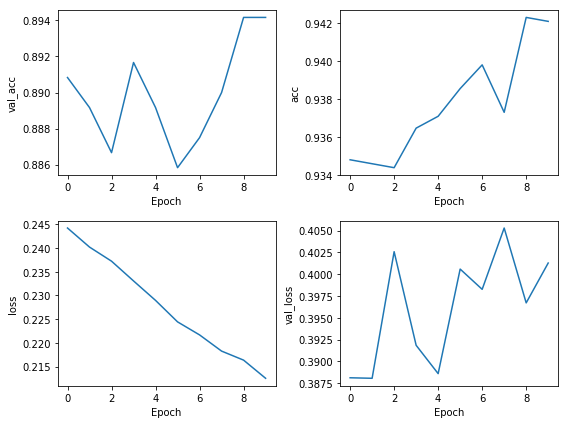

In [34]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(mlp_3_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

### LENET1
2600 free parameters
the images were downsampled to 16x16 and centered in 28x28 input layer

In [72]:
cnn = Sequential([
    Conv2D(20, kernel_size=(5, 5), strides=(2,2),
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same'),
    #Conv2D(16, (3, 3), activation='relu'),
    #Dropout(.25),#regularize
    #MaxPool2D(),
    Flatten(),
    #Dense(64, activation='relu'),
    #Dropout(.25),#regularize
    Dense(10, activation='softmax')
])

In [73]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 14, 14, 20)        520       
_________________________________________________________________
flatten_18 (Flatten)         (None, 3920)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                39210     
Total params: 39,730
Trainable params: 39,730
Non-trainable params: 0
_________________________________________________________________


In [74]:
cnn.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [55]:
from keras.callbacks import TensorBoard, EarlyStopping

In [56]:
tb = TensorBoard(log_dir='./tf_logs/cnn/')
es=EarlyStopping(patience=0)

In [77]:
cnn_history = cnn.fit(X_train, y_train, validation_split=.3, epochs=10, callbacks=[tb,es])# when we ran it again, we continue fitting

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 211us/step - loss: 0.3895 - acc: 0.8908 - val_loss: 0.2561 - val_acc: 0.9270
Epoch 2/10
42000/42000 [==============================] - 10s 227us/step - loss: 0.2279 - acc: 0.9347 - val_loss: 0.2049 - val_acc: 0.9412
Epoch 3/10
42000/42000 [==============================] - 9s 219us/step - loss: 0.1766 - acc: 0.9486 - val_loss: 0.1726 - val_acc: 0.9507
Epoch 4/10
42000/42000 [==============================] - 9s 217us/step - loss: 0.1433 - acc: 0.9596 - val_loss: 0.1422 - val_acc: 0.9599
Epoch 5/10
42000/42000 [==============================] - 9s 220us/step - loss: 0.1218 - acc: 0.9651 - val_loss: 0.1279 - val_acc: 0.9636
Epoch 6/10
42000/42000 [==============================] - 9s 221us/step - loss: 0.1074 - acc: 0.9691 - val_loss: 0.1213 - val_acc: 0.9649
Epoch 7/10
42000/42000 [==============================] - 9s 220us/step - loss: 0.0973 - acc: 0.9726 - val_loss: 0.1098 -

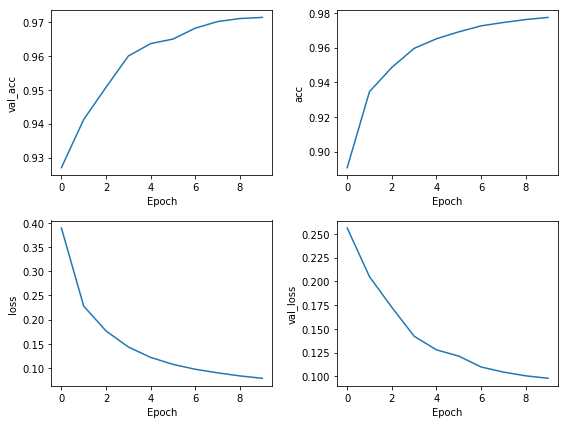

In [78]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(cnn_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

### LENET4
17000 parameters;
contains 4 first layer feature maps
8 subsampling maps
16 feature maps
16 subsampling maps
fully connected layer with 120 units
output layer with 10 units

In [101]:
cnn_1 = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(2,2),
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same'),
    MaxPool2D(),
    Conv2D(16, (3, 3), activation='relu'),
    #Dropout(.25),#regularize
    MaxPool2D(),
    Flatten(),# what difference does it make where the flatten is?
    Dense(120, activation='relu'),
    #Dropout(.25),#regularize
    Dense(10, activation='softmax')
])

In [102]:
cnn_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 14, 14, 6)         156       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 6)           0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 5, 5, 16)          880       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 120)               7800      
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1210      
Total para

In [103]:
cnn_1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [104]:
cnn_history = cnn_1.fit(X_train, y_train, validation_split=.3, epochs=10, callbacks=[tb,es])# when we ran it again, we continue fitting

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 200us/step - loss: 0.4730 - acc: 0.8534 - val_loss: 0.2104 - val_acc: 0.9356
Epoch 2/10
42000/42000 [==============================] - 8s 199us/step - loss: 0.1877 - acc: 0.9438 - val_loss: 0.1708 - val_acc: 0.9457
Epoch 3/10
42000/42000 [==============================] - 8s 198us/step - loss: 0.1556 - acc: 0.9527 - val_loss: 0.1455 - val_acc: 0.9531
Epoch 4/10
42000/42000 [==============================] - 9s 210us/step - loss: 0.1370 - acc: 0.9593 - val_loss: 0.1413 - val_acc: 0.9564
Epoch 5/10
42000/42000 [==============================] - 8s 201us/step - loss: 0.1237 - acc: 0.9623 - val_loss: 0.1338 - val_acc: 0.9567
Epoch 6/10
42000/42000 [==============================] - 8s 200us/step - loss: 0.1139 - acc: 0.9658 - val_loss: 0.1235 - val_acc: 0.9615
Epoch 7/10
42000/42000 [==============================] - 8s 197us/step - loss: 0.1061 - acc: 0.9675 - val_loss: 0.1202 - 

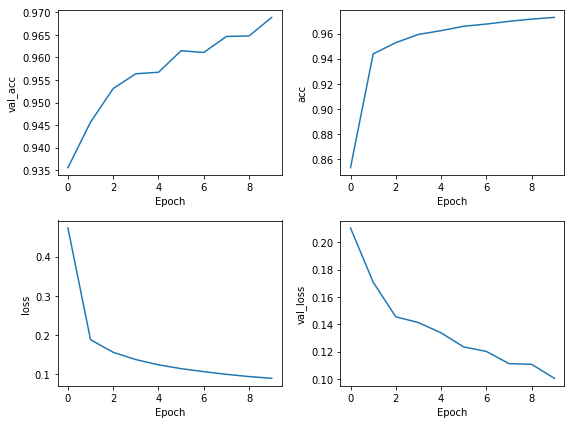

In [105]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(cnn_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()

### LENET5
7 layers
the input is 32x32?
c1: 6@28x28; 156 parameteres
s2: 6@14x14
c3: 16@10x10; should be 1516 parameters? (p.8)
s4: 16@5x5
c5: 120
f6: 84 ?
output:10

In [48]:
cnn_2 = Sequential([
    Conv2D(6, kernel_size=(5, 5), 
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same'),
    AveragePooling2D(),
    Conv2D(16, (5, 5), activation='relu'),
    AveragePooling2D(),
    Conv2D(120, (5,5), activation='relu'),
    Flatten(),# what difference does it make where the flatten is? 
    Dense(10, activation='softmax')
])

In [49]:
cnn_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_22 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_23 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_14 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1210      
Total para

In [53]:
cnn_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [59]:
cnn_history = cnn_2.fit(X_train, y_train, validation_split=.3, epochs=10, )# when we ran it again, we continue fitting #callbacks=[tb,es]

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 27s 634us/step - loss: 0.0506 - acc: 0.9845 - val_loss: 0.0665 - val_acc: 0.9797
Epoch 2/10
42000/42000 [==============================] - 26s 627us/step - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0634 - val_acc: 0.9806
Epoch 3/10
42000/42000 [==============================] - 26s 630us/step - loss: 0.0409 - acc: 0.9871 - val_loss: 0.0633 - val_acc: 0.9804
Epoch 4/10
42000/42000 [==============================] - 26s 629us/step - loss: 0.0379 - acc: 0.9879 - val_loss: 0.0619 - val_acc: 0.9814
Epoch 5/10
42000/42000 [==============================] - 27s 631us/step - loss: 0.0346 - acc: 0.9894 - val_loss: 0.0626 - val_acc: 0.9818
Epoch 6/10
42000/42000 [==============================] - 26s 628us/step - loss: 0.0325 - acc: 0.9902 - val_loss: 0.0630 - val_acc: 0.9821
Epoch 7/10
42000/42000 [==============================] - 26s 623us/step - loss: 0.0293 - acc: 0.9910 - val_loss: 0.

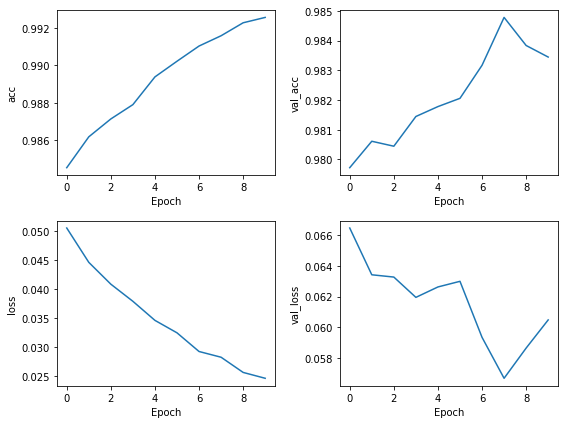

In [60]:
fig = plt.figure(figsize=(8,6))
for i, (title, data) in enumerate(cnn_history.history.items()):
    fig.add_subplot(2,2,1+i)
    plt.plot(data)
    plt.xlabel('Epoch')
    plt.ylabel(title)
plt.tight_layout()